This file was used to compare the values in our distributions with or without zero values. 

We concluded:
1. Takeaway 1: We do not need to reproject the variables Albedo, Net_Rad, LongW_inc, LongW_out, ShortW_inc, ShortW_out for 12/13 of our dates. No action item here. Why: The mean and median values do not change for most of our dates of interest because there are no zero values in LongW/ShortW inc/out. This guarantees we have no negative Albedo values, and Net_Rad values all come from good (aka positive) radiation readings.  
2. Takeaway 2: If we want to keep a Fall date (9/16/2014) we have to reproject any negative values for LongW/ShortW inc/out, and reproject all values for Albedo and Net_Rad. Why: There are a large number of negative ShortWave incoming and outgoing values, likely due to really low sun angle. For this date we can remove negative projected values of LongW_inc, LongW_out, ShortW_inc, ShortW_out and resample from our original distribution with negative values removed. However, for Albedo and Net_Rad for all of our projected values we don't know if that value in the distribution came from some combination of LongW/ShortW inc/out that includes a negative value so we must reproject them all. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

jovan_stats = pd.read_csv('data/nonZeroresultsTable.csv')

In [4]:
jovan_full_data = pd.read_csv('data/jovan_data.csv')
jovan_full_data.columns

Index(['VarName1', 'Year', 'Month', 'Day_of_Month', 'Hour', 'Minute', 'Second',
       'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC', 'Run_number',
       'Stop_number', 'Height', 'ShortW_inc', 'ShortW_out', 'Albedo',
       'LongW_inc', 'LongW_out', 'Net_shortW', 'Net_longW', 'Net_Rad',
       'Sol_Irr_inc', 'Sol_Irr_out', 'PAR_inc', 'PAR_out', 'fPAR', 'Red_i',
       'NIR_i', 'Red_r', 'NIR_r', 'NDVI', 'T_air_C', 'T_surf_C', 'veg_type',
       'Topo_feature', 'Polygon_type', 'date', 'DOY', 'Harukos_label'],
      dtype='object')

In [23]:
jovan_full_data['Polygon_type'].unique()

array(['LCP', 'HCP'], dtype=object)

In [5]:
testing_may = jovan_full_data[jovan_full_data['date'] == '2014-09-18']

In [6]:
testing_may[testing_may['LongW_out'] < 0]

,VarName1,Year,Month,Day_of_Month,Hour,Minute,Second,DD_AKST,DD_Expected_AKST,Offset_time,...,NIR_r,NDVI,T_air_C,T_surf_C,veg_type,Topo_feature,Polygon_type,date,DOY,Harukos_label


In [7]:
len(testing_may['ShortW_out'])

714

In [8]:
len(testing_may[testing_may['ShortW_out'] >= 0]['ShortW_out']) / len(testing_may['ShortW_out'])

0.6358543417366946

In [9]:
jovan_stats.columns


Index(['Date', 'LongW_inc_Mean_WithZeros', 'LongW_inc_Mean_NoZeros',
       'LongW_inc_Median_WithZeros', 'LongW_inc_Median_NoZeros',
       'LongW_inc_CoeffVar_WithZeros', 'LongW_inc_CoeffVar_NoZeros',
       'LongW_out_Mean_WithZeros', 'LongW_out_Mean_NoZeros',
       'LongW_out_Median_WithZeros', 'LongW_out_Median_NoZeros',
       'LongW_out_CoeffVar_WithZeros', 'LongW_out_CoeffVar_NoZeros',
       'ShortW_inc_Mean_WithZeros', 'ShortW_inc_Mean_NoZeros',
       'ShortW_inc_Median_WithZeros', 'ShortW_inc_Median_NoZeros',
       'ShortW_inc_CoeffVar_WithZeros', 'ShortW_inc_CoeffVar_NoZeros',
       'ShortW_out_Mean_WithZeros', 'ShortW_out_Mean_NoZeros',
       'ShortW_out_Median_WithZeros', 'ShortW_out_Median_NoZeros',
       'ShortW_out_CoeffVar_WithZeros', 'ShortW_out_CoeffVar_NoZeros',
       'Albedo_Mean_WithZeros', 'Albedo_Mean_NoZeros',
       'Albedo_Median_WithZeros', 'Albedo_Median_NoZeros',
       'Albedo_CoeffVar_WithZeros', 'Albedo_CoeffVar_NoZeros',
       'Net_Rad_Mean_Wi

In [10]:
jovan_stats

,Date,LongW_inc_Mean_WithZeros,LongW_inc_Mean_NoZeros,LongW_inc_Median_WithZeros,LongW_inc_Median_NoZeros,LongW_inc_CoeffVar_WithZeros,LongW_inc_CoeffVar_NoZeros,LongW_out_Mean_WithZeros,LongW_out_Mean_NoZeros,LongW_out_Median_WithZeros,...,Albedo_Median_WithZeros,Albedo_Median_NoZeros,Albedo_CoeffVar_WithZeros,Albedo_CoeffVar_NoZeros,Net_Rad_Mean_WithZeros,Net_Rad_Mean_NoZeros,Net_Rad_Median_WithZeros,Net_Rad_Median_NoZeros,Net_Rad_CoeffVar_WithZeros,Net_Rad_CoeffVar_NoZeros
0,05/28/2014,263.088042,263.088042,275.1430,275.1430,0.081404,0.081404,294.492763,294.492763,294.3820,...,0.7790,0.7790,0.028451,0.028451,49.157028,52.434597,54.7490,57.0720,0.724311,0.650596
1,06/10/2014,311.751430,311.751430,312.6270,312.6270,0.007305,0.007305,320.135666,320.135666,318.3700,...,0.4075,0.4075,0.361522,0.361522,100.270855,105.764363,100.7800,105.4255,0.787446,0.731646
2,06/25/2014,267.690441,267.690441,267.7450,267.7450,0.004042,0.004042,375.332088,375.332088,375.8880,...,0.1510,0.1510,0.279789,0.279789,455.321199,455.321199,446.1855,446.1855,0.067430,0.067430
3,08/01/2014,333.085511,333.085511,332.8180,332.8180,0.010167,0.010167,342.312588,342.312588,342.2915,...,0.1295,0.1295,0.224202,0.224202,119.832758,119.832758,115.2505,115.2505,0.184529,0.184529
4,09/16/2014,327.210464,327.210464,327.8730,327.8730,0.004710,0.004710,330.431180,330.431180,329.2800,...,0.0350,0.0455,12.380986,0.453235,34.086519,38.064717,18.0050,22.4250,1.055540,0.943993
5,06/13/2015,331.133433,331.133433,331.7750,331.7750,0.017734,0.017734,350.707234,350.707234,346.6910,...,0.1270,0.1270,0.234495,0.234495,117.685869,117.685869,103.9300,103.9300,0.588538,0.588538
6,08/02/2015,339.295139,339.295139,351.1635,351.1635,0.058800,0.058800,344.985020,344.985020,352.6845,...,0.1430,0.1430,0.166956,0.166956,28.119619,33.508789,21.5260,31.5860,1.074854,0.807029
7,04/29/2016,296.765243,296.765243,296.9925,296.9925,0.004339,0.004339,309.911596,309.911596,309.9980,...,0.8160,0.8160,0.008432,0.008432,54.539118,54.539118,54.9475,54.9475,0.129552,0.129552
8,05/22/2016,316.304886,316.304886,318.5760,318.5760,0.013512,0.013512,320.426184,320.426184,317.9480,...,0.4620,0.4620,0.361778,0.361778,53.839613,62.999004,36.3020,46.4280,0.972673,0.812196
9,06/05/2016,301.402697,301.402697,309.7985,309.7985,0.048015,0.048015,321.729627,321.729627,320.4220,...,0.1490,0.1490,0.222505,0.222505,103.021314,114.222735,67.8245,112.0880,1.011159,0.898229


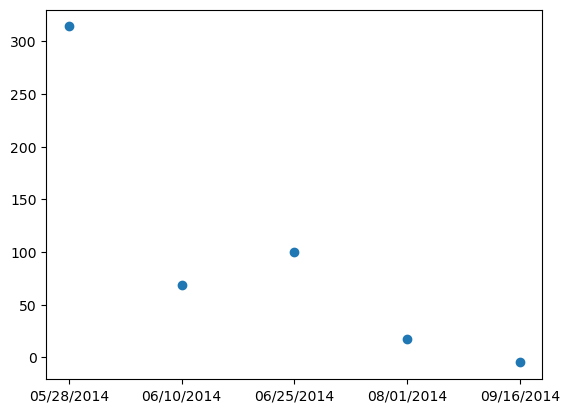

In [22]:

plt.scatter(jovan_stats['Date'][:5], jovan_stats['ShortW_out_Median_WithZeros'][:5])

In [21]:
with_zeros_cols = [col for col in jovan_stats.columns if '_WithZeros' in col]
no_zeros_col = [col.replace('_WithZeros', '_NoZeros') for col in with_zeros_cols]

diff_df = pd.DataFrame()

for wz_col, nz_col in zip(with_zeros_cols, no_zeros_col):
    diff_col_name = wz_col.replace('_WithZeros', 'Difference')
    diff_df[diff_col_name] = jovan_stats[wz_col] - jovan_stats[nz_col]

diff_df['Date'] = jovan_stats['Date']

In [22]:
diff_df

,LongW_inc_MeanDifference,LongW_inc_MedianDifference,LongW_inc_CoeffVarDifference,LongW_out_MeanDifference,LongW_out_MedianDifference,LongW_out_CoeffVarDifference,ShortW_inc_MeanDifference,ShortW_inc_MedianDifference,ShortW_inc_CoeffVarDifference,ShortW_out_MeanDifference,ShortW_out_MedianDifference,ShortW_out_CoeffVarDifference,Albedo_MeanDifference,Albedo_MedianDifference,Albedo_CoeffVarDifference,Net_Rad_MeanDifference,Net_Rad_MedianDifference,Net_Rad_CoeffVarDifference,Date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,-3.277569,-2.3230,0.073715,05/28/2014
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,-5.493508,-4.6455,0.055800,06/10/2014
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,0.000000,0.0000,0.000000,06/25/2014
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,0.000000,0.0000,0.000000,08/01/2014
4,0.0,0.0,0.0,0.0,0.0,0.0,-20.505774,-32.432,0.530056,-6.763953,-9.028,-2.560898,-0.03803,-0.0105,11.927752,-3.978199,-4.4200,0.111546,09/16/2014
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,0.000000,0.0000,0.000000,06/13/2015
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,-5.389170,-10.0600,0.267825,08/02/2015
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,0.000000,0.0000,0.000000,04/29/2016
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,-9.159391,-10.1260,0.160477,05/22/2016
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00000,0.0000,0.000000,-11.201421,-44.2635,0.112929,06/05/2016
